## Lab 2 Point Pattern Analysis

In this lab we will perform point pattern analysis using R. Similar to previous labs, we will use a set of libraries and then create charts as well as maps of our data.

## Loading libraries and our earthquakes data

Let's first import our data and load up our libraries.

We will use a library called **readr**.
Our data is in the `data` directory and it is titled `earthquakes.csv`

First, write a line of code below that imports the `readr` library.
Remember that you can import libraries via:
`library(name_of_library)`

In [8]:
#line of code to import readr


Next, write a line of code below to read in the earthquake data.

Remember that in R, we name the variable on the left hand side and then use a function to read in the data.

The structure is like this:

    variable_name <- read_csv('file location')

In our case, the file is `earthquakes.csv` and the file location is `data/earthquakes.csv`

In [11]:
# Line of code to make a variable called quakes and read in csv from 'data/earthquakes.csv'


Parsed with column specification:
cols(
  CUSP_ID = col_integer(),
  NZMGE = col_integer(),
  NZMGN = col_integer(),
  ELAPSED_DAYS = col_double(),
  MAG = col_double(),
  DEPTH = col_double(),
  YEAR = col_integer(),
  MONTH = col_integer(),
  DAY = col_integer(),
  HOUR = col_integer(),
  MINUTE = col_integer(),
  SECOND = col_double()
)


You should see also see a data table appear in red as part of the output. The data appear very similar to a spreadsheet. 

In R, data tables are known as dataframes and each column is an attribute or variable.
The various variables that appear in the table are:

    CUSP_ID a unique identifier for each earthquake or aftershock event
    NZMGE and NZMGN are New Zealand Map Grid Easting and Northing coordinates
    ELAPSED_DAYS is the number of days after September 3, 2010, when the big earthquake was recorded
    MAG is the earthquake or aftershock magnitude
    DEPTH is the estimate depth at which the earthquake or aftershock occurred
    YEAR, MONTH, DAY, HOUR, MINUTE, SECOND provide detailed time information

## Examining the Data

In [18]:
mean(quakes$MAG)

[1] 2.920695

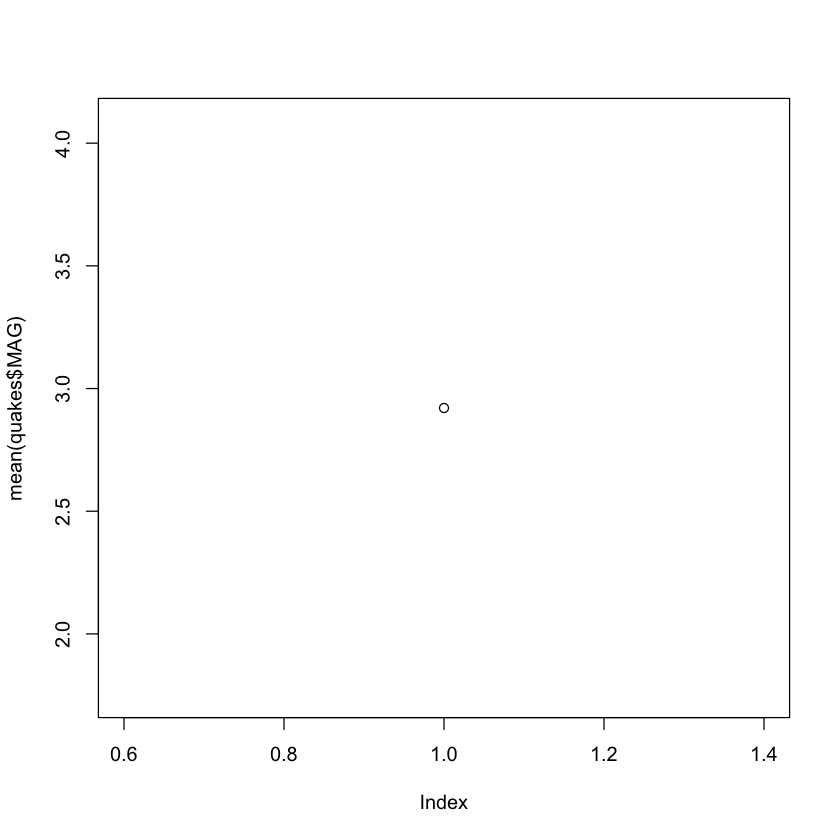

In [24]:
plot(mean(quakes$MAG))

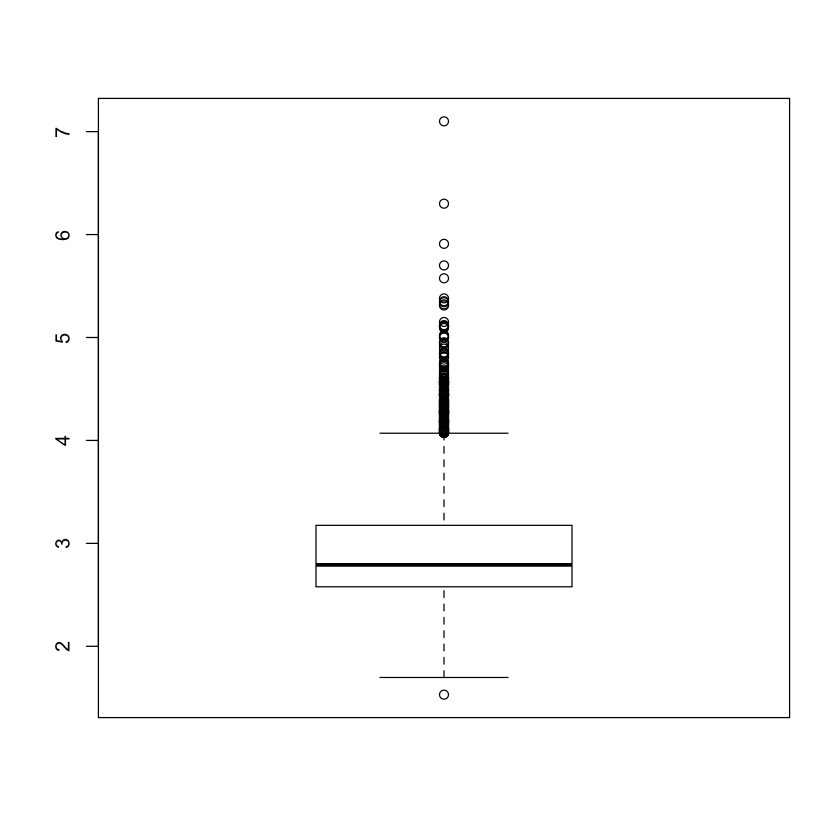

In [26]:
boxplot(quakes$MAG)

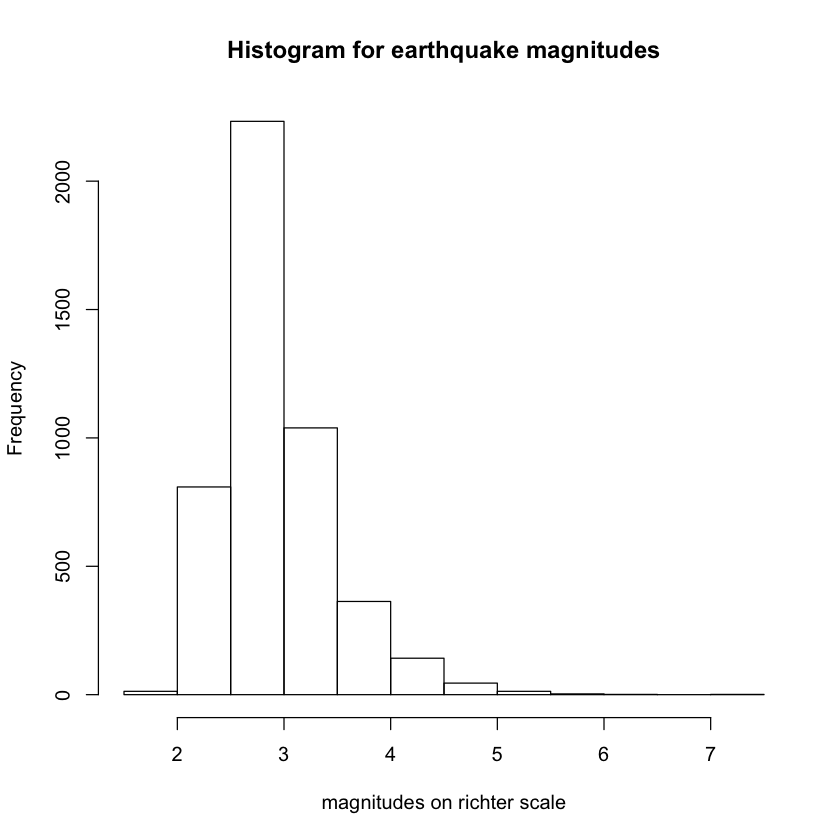

In [30]:
hist(quakes$MAG,xlab="magnitudes on richter scale",main="Histogram for earthquake magnitudes")

# main="Histogram for earthquake magnitudes", 
#      xlab="magnitudes", 
#      border="blue", 
#      col="green",
#      xlim=c(100,700),
#      las=1, 
#      breaks=5

In [2]:
tree.heights <- c(4, 5.3, 2.7, 8)

In [5]:
tree.heights

[1] 4.0 5.3 2.7 8.0

In [6]:
tree.heights **2

[1] 16.00 28.09  7.29 64.00

In [8]:
tree.heights[1]

[1] 4